<a href="https://colab.research.google.com/github/hellooishik/Python-for-Data-Science-AI-Development---IBM-/blob/main/ApisInPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

It just a Data, It the directory

In [3]:
dict_ = {'a' : [11,21,31], 'b' : [12,22,32]}

In [4]:
df = pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [6]:
df.mean()

,0
a,21.0
b,22.0


In this lab, we will use the NBA API to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API to determine the number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly it the Golden State Warriors lost by two points the result will be negative two. The API will handle a lot of the details, such a Endpoints and Authentication.

In [7]:
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 6.2 MB/s eta 0:00:00


In [8]:
from nba_api.stats.static import teams

In [9]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [10]:
nba_teams = teams.get_teams()

In [11]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [12]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


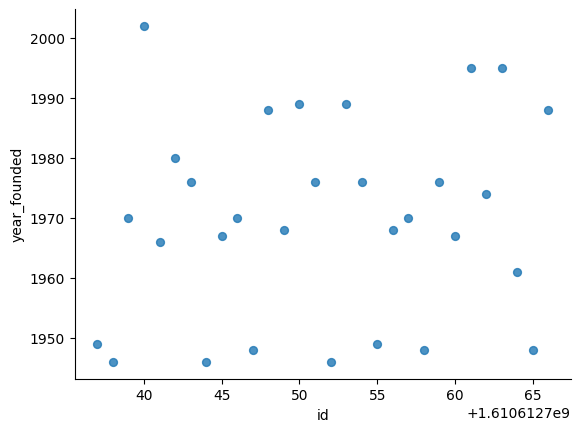

In [14]:
from matplotlib import pyplot as plt
df_teams.plot(kind='scatter', x='id', y='year_founded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [16]:
id_warriors=df_warriors[['id']].values[0][0]
# we now have an integer that can be used to request the Warriors information
id_warriors

1610612744

In [17]:
from nba_api.stats.endpoints import leaguegamefinder

In [18]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")

In [19]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [20]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

In [21]:
games_home['PLUS_MINUS'].mean()

3.730769230769231

In [22]:
games_away['PLUS_MINUS'].mean()

-0.6071428571428571

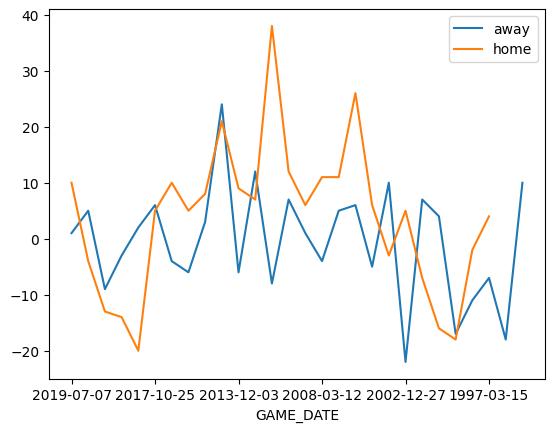

In [23]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

In [24]:
# Write your code below and press Shift+Enter to execute
games_home['PTS'].mean()

games_away['PTS'].mean()

102.96428571428571

# Practice Project: GDP Data Extraction and Processing

In [25]:
#Install required packages
!pip install pandas numpy
!pip install lxml

In [26]:
import numpy as np
import pandas as pd

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [27]:
URL="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

In [32]:
# Extract tables from webpage using Pandas. Retain table number 3 as the required dataframe.
tables = pd.read_html(URL)
df = tables[3]

# Replace the column headers with column numbers
df.columns = range(df.shape[1])

# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0,2]]

# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
df = df.iloc[1:11,:]

# Assign column names as "Country" and "GDP (Million USD)"
df.columns = ['Country','GDP (Million USD)']
df.head()

,Country,GDP (Million USD)
1,United States,26854599
2,China,19373586
3,Japan,4409738
4,Germany,4308854
5,India,3736882


In [33]:
# Extract tables from webpage using Pandas. Retain table number 3 as the required dataframe.
tables = pd.read_html(URL)
df = tables[3]

# Replace the column headers with column numbers
df.columns = range(df.shape[1])

# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0,2]]

# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
df = df.iloc[1:11,:]

# Assign column names as "Country" and "GDP (Million USD)"
df.columns = ['Country','GDP (Million USD)']

In [34]:
# Change the data type of the 'GDP (Million USD)' column to integer. Use astype() method.
df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)

# Convert the GDP value in Million USD to Billion USD
df[['GDP (Million USD)']] = df[['GDP (Million USD)']]/1000

# Use numpy.round() method to round the value to 2 decimal places.
df[['GDP (Million USD)']] = np.round(df[['GDP (Million USD)']], 2)

# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
df.rename(columns = {'GDP (Million USD)' : 'GDP (Billion USD)'})

,Country,GDP (Billion USD)
1,United States,26854.60
2,China,19373.59
3,Japan,4409.74
4,Germany,4308.85
5,India,3736.88
6,United Kingdom,3158.94
7,France,2923.49
8,Italy,2169.74
9,Canada,2089.67
10,Brazil,2081.24


In [35]:
# Load the DataFrame to the CSV file named "Largest_economies.csv"
df.to_csv('./Largest_economies.csv')